In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

In [11]:
TRAIN_DATA_PATH = ".\\asl" 

NUM_OF_LETTERS = 26 # "A" to "Z" 
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

LABELS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
        'n','o', 'p', 'q','r', 's', 't','u', 'v', 'w', 'x', 'y', 'z']
print(len(LABELS))

26


In [12]:
#appending image of each type in list
y_unique = []
x_unique = []
for alphabet in os.listdir(TRAIN_DATA_PATH):
    for image in os.listdir(TRAIN_DATA_PATH+str('\\')+alphabet):
        X=imread(TRAIN_DATA_PATH+str('\\')+alphabet+str('\\')+image)
        x_unique.append(X)
        y_unique.append(alphabet)
        break

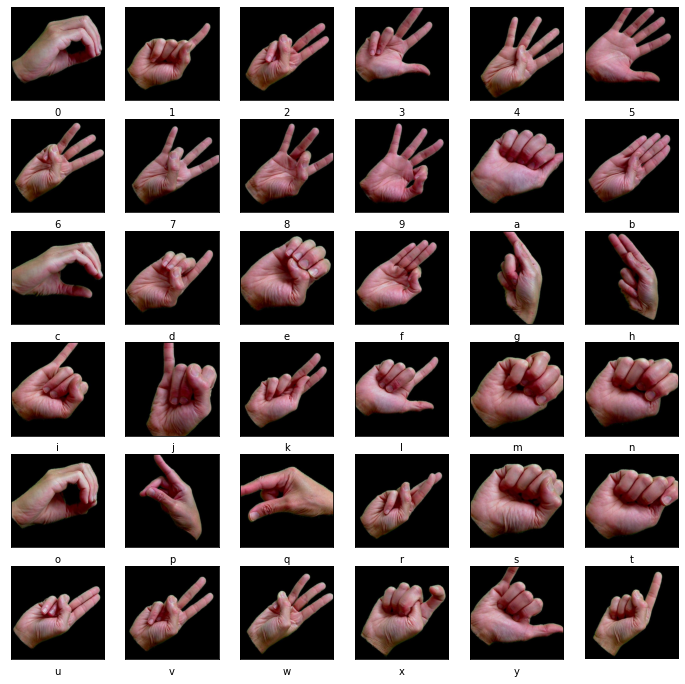

In [13]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [14]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    paths=[]
    for label in LABELS:
        path = os.path.join(DATA_PATH, label)
        label_name = LABELS.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


.\asl\a\a_10_rotate_1.jpeg
.\asl\a\a_10_rotate_10.jpeg
.\asl\a\a_10_rotate_2.jpeg
.\asl\a\a_10_rotate_3.jpeg
.\asl\a\a_10_rotate_4.jpeg
.\asl\a\a_10_rotate_5.jpeg
.\asl\a\a_10_rotate_6.jpeg
.\asl\a\a_10_rotate_7.jpeg
.\asl\a\a_10_rotate_8.jpeg
.\asl\a\a_10_rotate_9.jpeg
.\asl\a\a_11_rotate_1.jpeg
.\asl\a\a_11_rotate_10.jpeg
.\asl\a\a_11_rotate_2.jpeg
.\asl\a\a_11_rotate_3.jpeg
.\asl\a\a_11_rotate_4.jpeg
.\asl\a\a_11_rotate_5.jpeg
.\asl\a\a_11_rotate_6.jpeg
.\asl\a\a_11_rotate_7.jpeg
.\asl\a\a_11_rotate_8.jpeg
.\asl\a\a_11_rotate_9.jpeg
.\asl\a\a_12_rotate_1.jpeg
.\asl\a\a_12_rotate_10.jpeg
.\asl\a\a_12_rotate_2.jpeg
.\asl\a\a_12_rotate_3.jpeg
.\asl\a\a_12_rotate_4.jpeg
.\asl\a\a_12_rotate_5.jpeg
.\asl\a\a_12_rotate_6.jpeg
.\asl\a\a_12_rotate_7.jpeg
.\asl\a\a_12_rotate_8.jpeg
.\asl\a\a_12_rotate_9.jpeg
.\asl\a\a_13_rotate_1.jpeg
.\asl\a\a_13_rotate_10.jpeg
.\asl\a\a_13_rotate_2.jpeg
.\asl\a\a_13_rotate_3.jpeg
.\asl\a\a_13_rotate_4.jpeg
.\asl\a\a_13_rotate_5.jpeg
.\asl\a\a_13_rotate_6.jp

In [15]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

18150


In [16]:
X_train=np.array(X_train)

In [17]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(18150, 50, 50, 1)


In [18]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [19]:
y_train = to_categorical(y_train, NUM_OF_LETTERS)
print(X_train.shape)


(18150, 50, 50, 1)


In [20]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [21]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [22]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_LETTERS, activation = "softmax"))

# Compiling CNN Model

In [23]:
model.compile(
    optimizer = "adam", 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 50)        500       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 50)        22550     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 100)       45100     
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 100)       90100     
                                                        

# Training Model

In [25]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 52,
    epochs = 5,
    shuffle = True
)

Epoch 1/5
350/350 [==============================] - 179s 510ms/step - loss: 0.6353 - accuracy: 0.7921
Epoch 2/5
350/350 [==============================] - 221s 631ms/step - loss: 0.0993 - accuracy: 0.9671
Epoch 3/5
350/350 [==============================] - 231s 659ms/step - loss: 0.0578 - accuracy: 0.9813
Epoch 4/5
350/350 [==============================] - 205s 584ms/step - loss: 0.0430 - accuracy: 0.9873
Epoch 5/5
350/350 [==============================] - 180s 513ms/step - loss: 0.0360 - accuracy: 0.9887


# Saving Model for future use

In [26]:
#Saving Model
from keras.models import load_model
model.save('model.h5') 